<a href="https://colab.research.google.com/github/Shiyasalloor/Image_and_Video_processing_lab/blob/main/Set_2_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
# Upload a clean image
print("Upload a clean image:")
uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Upload a clean image:


Saving Screenshot 2024-04-16 223159.png to Screenshot 2024-04-16 223159.png


In [3]:
image = cv2.resize(image, (256, 256))

def add_gaussian_noise(img, mean=0, stddev=25):
    noise = np.random.normal(mean, stddev, img.shape).astype(np.float32)
    noisy_img = img.astype(np.float32) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

def average_noisy_images(base_image, count):
    sum_img = np.zeros_like(base_image, dtype=np.float32)
    for _ in range(count):
        noisy = add_gaussian_noise(base_image)
        sum_img += noisy
    avg_img = sum_img / count
    return np.clip(avg_img, 0, 255).astype(np.uint8)

Original Image:


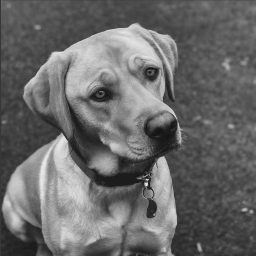

noisy Image:


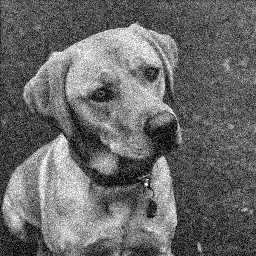

Averaged over 2 noisy images


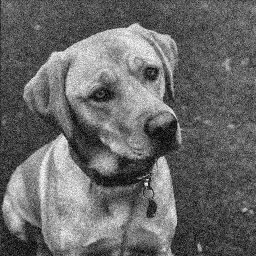

Averaged over 8 noisy images


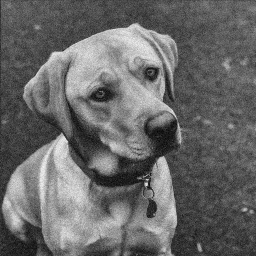

Averaged over 16 noisy images


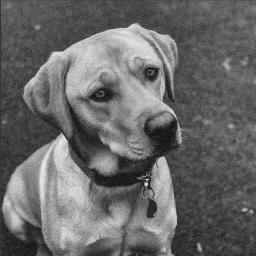

Averaged over 32 noisy images


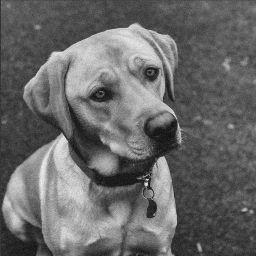

Averaged over 128 noisy images


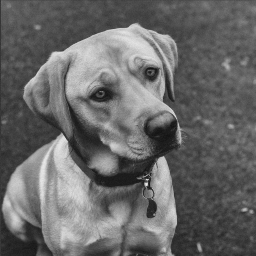

In [5]:
# Average with different numbers
averaged_images = {}
counts = [2, 8, 16, 32, 128]
for c in counts:
    averaged_images[c] = average_noisy_images(image, c)

# Display results
def show(title, img):
    print(title)
    cv2_imshow(img)

print("Original Image:")
cv2_imshow(image)

print("noisy Image:")
noisy_image = add_gaussian_noise(image)
cv2_imshow(noisy_image)

for c in counts:
    show(f"Averaged over {c} noisy images", averaged_images[c])